![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)

# 人工智能基础课机器学习 第三节课作业 线性回归

同学们大家好，本次作业是考察学生对线性回归的理解与SKLearn的使用，以及pandas的使用。

本次作业的数据集：data.csv
这份数据代表了一个循环发电厂，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)

问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即: PE=W0+W1∗AT+W2∗V+W3∗AP+W4∗RH 而需要学习的，就是W0,W1,W2,W3,W4这5个参数。


In [1]:
# -*- coding: UTF-8 -*-


import math

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# 第一步：读取样本数据，并将数据集分为训练集和测试集




In [2]:
# 数据预处理
ccpp_df = pd.read_csv("data.csv")
ccpp_df = ccpp_df.drop_duplicates()
ccpp_df = ccpp_df.reset_index(drop=True)

ccpp_df = ccpp_df.dropna()
ccpp_df = ccpp_df.reset_index(drop=True)


# 将数据转换为 array
# x 代表样本特征集，y 代表样本标签集
x = np.array(ccpp_df.iloc[:, :4])
y = np.array(ccpp_df.iloc[:, -1:])


# 数据量较小（一万以下），将训练集和测试集划分为 7:3，即 test_size=0.3
# 指定随机数种子 random_state 为 1，保证重复运行程序时，每次得到的训练集和测试集都一致
# x_train 代表训练样本特征集，y_train 代表训练样本标签集
# x_test 代表测试样本特征集，y_test 代表测试样本标签集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#  第二步：训练Linear Regreesion模型，得到训练参数



In [3]:
# 调用模型
lr = LinearRegression()


# 训练模型
lr.fit(x_train, y_train)


# 打印训练参数 W0, W1, W2, W3, W4
print("W0: {0}".format(lr.intercept_[0]))
print(", ".join([("W"+str(i+1)+": "+str(lr.coef_[0][i])) for i in range(len(lr.coef_[0]))]))

W0: 445.06270469357474
W1: -1.9617673526393946, W2: -0.23964682673462956, W3: 0.0714580148656427, W4: -0.15811994049531902


# 第三步：使用均方误差和均方根误差在测试集上的表现来评价模型的好坏。



In [4]:
# 计算在测试集上的均方误差(MSE)和均方根误差(RMSE)
y_test_pred = lr.predict(x_test)

MSE = mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)

# 打印在测试集上的均方误差(MSE)和均方根误差(RMSE)
print("MSE: {0}, RMSE: {1}".format(MSE, RMSE))


# 计算测试样本 PE 均值
PE_test_mean = y_test.mean()

# 打印测试样本 PE 均值
print("测试样本 PE 均值: {0}".format(PE_test_mean))

MSE: 21.27130050802177, RMSE: 4.612082014450932
测试样本 PE 均值: 454.4467016439315


相对于测试样本 PE 均值 454.45，RMSE 只有 4.61，因此可以认为模型质量较好。

# 第四步：可视化的方式直观的表示模型学习效果的好坏



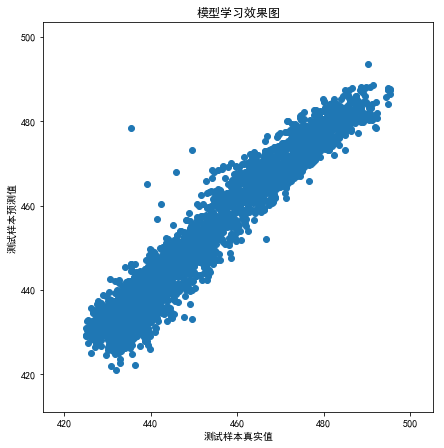

In [5]:
# 模型学习效果图

# 排序
sorted_indices = np.argsort(y_test[:,0], axis=0)
sorted_y_test = y_test[sorted_indices]
sorted_y_test_pred = y_test_pred[sorted_indices]


# 画布设置
def regular_figsize_y(figsize_x, xlim_l, xlim_r, ylim_u, ylim_d):
    result = 0

    result = abs(figsize_x * (ylim_u - ylim_d) / (xlim_r - xlim_l))

    return result


figsize_x, figsize_y = 7, 7

xlim_l, xlim_r = sorted_y_test.min()-10, sorted_y_test.max()+10
ylim_d, ylim_u = sorted_y_test_pred.min()-10, sorted_y_test_pred.max()+10


plt.figure(figsize=(figsize_x, regular_figsize_y(figsize_x, xlim_l, xlim_r, ylim_u, ylim_d)))

# 解决中文显示问题
plt.rcParams["font.sans-serif"] = ["SimHei"] # 指定默认字体
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams["axes.unicode_minus"] = False

# x, y 轴标签和标题
plt.xlabel("测试样本真实值")
plt.ylabel("测试样本预测值")
plt.title("模型学习效果图")

plt.scatter(sorted_y_test, sorted_y_test_pred)

plt.xlim(xlim_l, xlim_r)
plt.ylim(ylim_d, ylim_u)

plt.show()